In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.colors import ListedColormap


In [2]:
file_name = 'route1_90.csv'
df = pd.read_csv(file_name)
df = df.drop(columns=['time'])

# Mapping categorical values to specific numbers
mapping = {'LoS A': 0, 'LoS B': 1, 'LoS C': 2, 'LoS D': 3, 'LoS E': 4, 'LoS F': 5}
df_mapped = df.replace(mapping)
df_mapped.head()


# Add a dummy row to ensure full color range is rendered
dummy_row = [3, 4, 5] + [0] * (df_mapped.shape[1] - 3)
df_mapped.loc[len(df_mapped)] = dummy_row

df_transposed = df_mapped.T

FileNotFoundError: [Errno 2] No such file or directory: 'route1_90.csv'

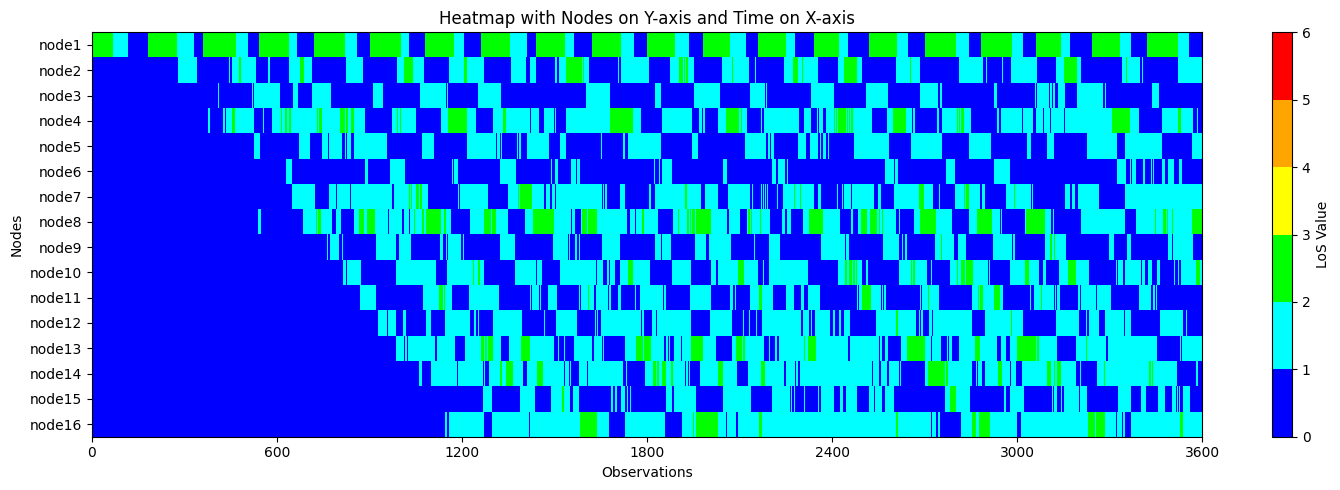

In [38]:
# Define custom hex colors for values 0 to 5
cmap = ListedColormap(['#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FFA500', '#FF0000'])
# Plot the heatmap
plt.figure(figsize=(15, 5))
plt.imshow(df_transposed, aspect='auto', cmap=cmap, interpolation='none', vmin=0, vmax=6)
plt.colorbar(label='LoS Value')
# plt.xticks(ticks=np.arange(df_transposed.shape[1]), labels=[f'Obs {i}' for i in range(df_transposed.shape[1])])


x_ticks = np.arange(0, df_transposed.shape[1], 600)
x_labels = [f'{i}' for i in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels)

plt.yticks(ticks=np.arange(df_transposed.shape[0]), labels=df_transposed.index)
plt.title('Heatmap with Nodes on Y-axis and Time on X-axis')
plt.xlabel('Observations')
plt.ylabel('Nodes')
plt.tight_layout()
plt.show()

